In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 

In [3]:
#load data
df=pd.read_csv('/home/mukesh/diabetes.csv')
df.describe().round(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


#Data Preprocessing

#Refrence for data preprocessing - https://www.kaggle.com/code/jyotigupta86/diabetes-prediction

In [5]:
# no of class 
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.groupby('Outcome').mean().round(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [7]:
#separating the data and labels
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

In [8]:
#Data Standardization
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [9]:
standardized_data=scaler.transform(X)


In [10]:
X=standardized_data
Y=df['Outcome']

In [12]:
#Train Test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

#model

Loss: 0.691825841628308 	
Loss: 0.6905099470795011 	
Loss: 0.6865949264277967 	
Loss: 0.6891994966658258 	


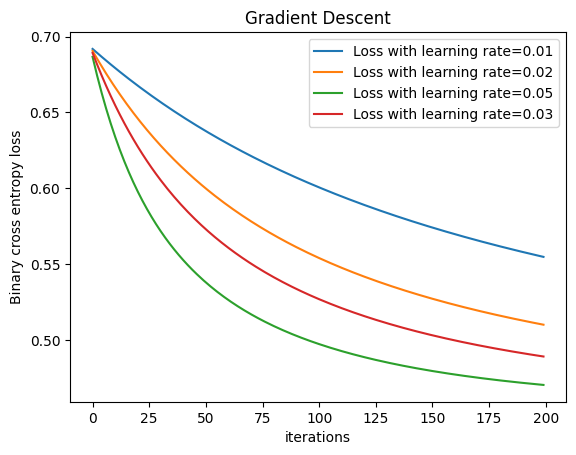

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        xla=np.arange(0,self.num_iterations,1)
        lo=[]
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            #GD
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient 
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            lo.append(self.__loss(h, y))
            if(i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')
        plt.plot(xla,lo,label="Loss with learning rate="+str(self.learning_rate))
        plt.xlabel("iterations")
        plt.ylabel("Binary cross entropy loss")
        plt.title("Gradient Descent")

        plt.legend()
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold


for LR in [0.01,0.02,0.05,0.03]:
    model = LogisticRegression(learning_rate=LR, num_iterations=200)
    model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test, 0.5)



Loss: 0.6906412915429199 	
Loss: 0.6881550558403416 	
Loss: 0.6808142256089843 	
Loss: 0.6856884702250814 	


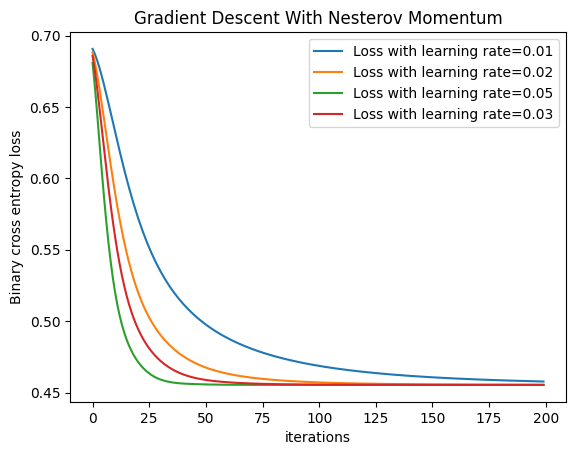

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000, fit_intercept=True, gamma=0.9):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.gamma = gamma
        self.v = None    
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        self.v = np.zeros(X.shape[1])
        xla=np.arange(0,self.num_iterations,1)
        lo=[]
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            #nestrovs 
            gradient = np.dot(X.T, (h - y)) / y.size
            self.v = self.gamma * self.v + self.learning_rate * gradient
            self.theta -= self.gamma * self.v + self.learning_rate * gradient

            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            lo.append(self.__loss(h, y))
            if(i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')
        plt.plot(xla,lo,label="Loss with learning rate="+str(self.learning_rate))
        plt.xlabel("iterations")
        plt.ylabel("Binary cross entropy loss")
        plt.title("Gradient Descent With Nesterov Momentum")
        plt.legend()
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold


for LR in [0.01,0.02,0.05,0.03]:
    model = LogisticRegression(learning_rate=LR, num_iterations=200, gamma=0.9)
    model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test, 0.5)

# Print predicted labels and probabilities
#print('Predicted Labels:', y_pred)
#print('Predicted Probabilities:', model.predict_prob(X_test))


Loss: 0.9977037212790643 	
Loss: 0.9954074425581286 	
Loss: 0.9885186063953215 	
Loss: 0.9931111638371929 	


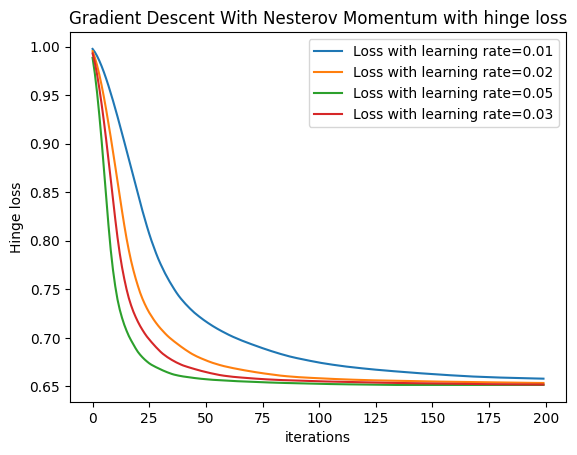

In [33]:
class Logistic_Regression:
    def __init__(self, learning_rate=0.01, num_iterations=100000, fit_intercept=True, gamma=0.9):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.gamma = gamma
        self.v = None    
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, z, y):
        hinge_loss = np.maximum(0, 1 - y * z)
        return hinge_loss.mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        self.v = np.zeros(X.shape[1])
        xla=np.arange(0,self.num_iterations,1)
        lo=[]
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            #nestrovs 
            gradient = np.dot(X.T, -y * (1 - h)) / y.size
            self.v = self.gamma * self.v + self.learning_rate * gradient
            self.theta -= self.gamma * self.v + self.learning_rate * gradient

            z = np.dot(X, self.theta)
            lo.append(self.__loss(z, y))
            if(i % 10000 == 0):
                print(f'Loss: {self.__loss(z, y)} \t')
        plt.plot(xla,lo,label="Loss with learning rate="+str(self.learning_rate))
        plt.xlabel("iterations")
        plt.ylabel("Hinge loss")
        plt.title("Gradient Descent With Nesterov Momentum with hinge loss")
        plt.legend()
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    


for LR in [0.01,0.02,0.05,0.03]:
    model = Logistic_Regression(learning_rate=LR, num_iterations=200, gamma=0.9)
    model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test, 0.5)


Loss: 0.8255784955412864 	
Loss: 0.8254240956362338 	
Loss: 0.8249609531343637 	
Loss: 0.8252697028836247 	


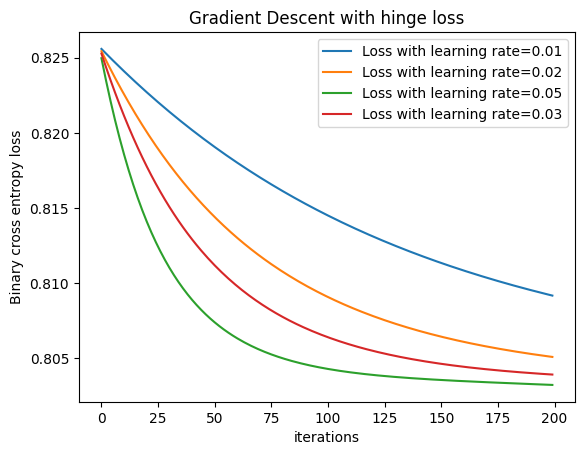

In [34]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, z, y):
        hinge_loss = np.maximum(0, 1 - y * z)
        return hinge_loss.mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        xla=np.arange(0,self.num_iterations,1)
        lo=[]
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            #GD
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient 
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            lo.append(self.__loss(h, y))
            if(i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')
        plt.plot(xla,lo,label="Loss with learning rate="+str(self.learning_rate))
        plt.xlabel("iterations")
        plt.ylabel("Binary cross entropy loss")
        plt.title("Gradient Descent with hinge loss")

        plt.legend()
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold


for LR in [0.01,0.02,0.05,0.03]:
    model = LogisticRegression(learning_rate=LR, num_iterations=200)
    model.fit(X_train, Y_train)

# Predict on test data
y_pred = model.predict(X_test, 0.5)

# Print predicted labels and probabilities
#print('Predicted Labels:', y_pred)
#print('Predicted Probabilities:', model.predict_prob(X_test))
